In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from subprocess import check_output
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#print(check_output(["ls", "Data"]).decode("utf8"))
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
data = pd.read_csv('Data/timesData.csv')

In [4]:
def parseFloat(x):
    try:
        x = float(x)
    except:
        x = 0
    return x

def parseStringCommas(x):
    try:
        x = int(x.replace(',',''))
    except:
        x = 0
    return x

def parseStringModulus(x):
    try:
        x = int(x.replace('%',''))
    except:
        x = 0
    return x

def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x


In [5]:
data['female'] = data['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
data['male'] = data['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
data['sex_ratio'] =  np.where(data['male'] == 0, 0, data['male']/data['female'])

In [6]:
columnstoFloat = ['world_rank', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'student_staff_ratio']  

for column in columnstoFloat:
    data[column] = data[column].apply(parseFloat)

In [7]:
data['num_students'] = data['num_students'].apply(parseStringCommas)
data['year'] = data['year'].apply(lambda x : int(x))
data['international_students'] = data['international_students'].apply(parseStringModulus)

In [8]:
cleanData = data[(data.world_rank != 0) & (data.year == 2015)][['world_rank', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'sex_ratio']]

In [35]:
cleanData

,world_rank,teaching,international,research,citations,income,total_score,sex_ratio
1402,1.0,92.2,67.0,98.1,99.7,89.1,94.3,2.030303
1403,2.0,92.9,67.6,98.6,98.9,44.0,93.3,0.000000
1404,3.0,88.6,90.7,97.7,95.5,72.9,93.2,1.173913
1405,4.0,91.5,69.0,96.7,99.1,63.1,92.9,1.380952
1406,5.0,89.7,87.8,95.6,95.2,51.1,92.0,1.173913
1407,6.0,89.1,84.3,88.2,100.0,95.7,91.9,1.702703
1408,7.0,86.6,61.2,94.7,99.6,82.7,90.9,1.222222
1409,8.0,84.2,58.5,96.7,99.1,44.8,89.5,1.000000
1410,9.0,84.6,92.7,88.3,89.4,72.7,87.5,1.702703
1411,9.0,88.5,59.8,90.8,94.0,42.0,87.5,1.000000


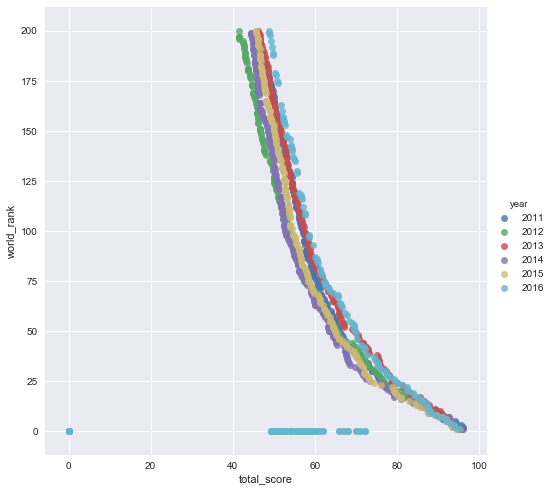

In [37]:
import seaborn as sns

f = lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if len(str(x).strip()) > 3 else x

#cleanData['world_rank'] = cleanData['world_rank'].str.replace('=','').map(f).astype('float')
vis2 = sns.lmplot(data=data, x='total_score', y='world_rank', fit_reg=False, hue='year', size=7, aspect=1)

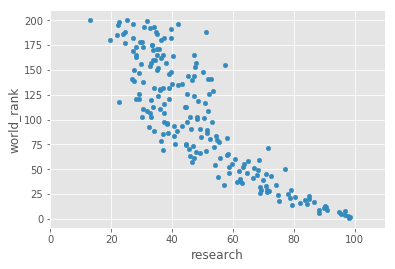

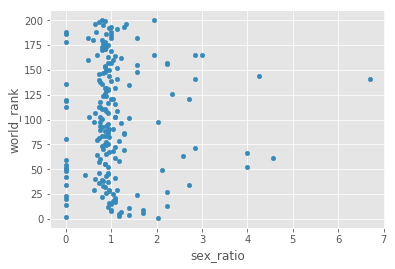

In [9]:
cleanData.plot(y='world_rank', x = 'research', kind='scatter', xlim=(0,110))
cleanData.plot(y='world_rank', x = 'sex_ratio', kind='scatter')
#scatter_matrix(cleanData, alpha=0.5, figsize=(15,15), diagonal='kde')

In [10]:
train, test = train_test_split(cleanData, test_size = 0.3)

features = train[['teaching','international', 'research', 'citations', 'sex_ratio']]
y = train['total_score']
lm = LinearRegression()
lm.fit(features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print( 'Coefficients',lm.coef_)

Coefficients [ 0.29053782  0.07450091  0.31670898  0.28843822  0.32272886]


In [19]:
print( 'Intercept', lm.intercept_)
print( 'RSquared', lm.score(features, y))

Intercept 1.62274654467


RSquared 0.998512849421


In [17]:
output = pd.DataFrame(lm.predict(test[['teaching','international', 'research', 'citations', 'sex_ratio']]), columns =['Prediction'])
output['Actual'] = test['total_score'].reset_index(drop=True)
print(output.head())

   Prediction  Actual
0   49.586751    49.0
1   48.274960    48.0
2   49.006170    49.2
3   74.700380    74.3
4   54.474960    53.9


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

rf = RandomForestRegressor(n_estimators=20)
rf.fit(features, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
#print( 'Intercept', rf.intercept_)
print( 'RSquared', rf.score(features, y))

RSquared 0.99194081571


In [23]:
output = pd.DataFrame(rf.predict(test[['teaching','international', 'research', 'citations', 'sex_ratio']]), columns =['Prediction'])
output['Actual'] = test['total_score'].reset_index(drop=True)
print(output.head())

   Prediction  Actual
0      48.415    49.0
1      48.275    48.0
2      48.360    49.2
3      72.025    74.3
4      52.300    53.9


In [27]:
nn = MLPRegressor()
nn.fit(features, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
print( 'RSquared', nn.score(features, y))

RSquared 0.807058802555


In [30]:
output = pd.DataFrame(nn.predict(test[['teaching','international', 'research', 'citations', 'sex_ratio']]), columns =['Prediction'])
output['Actual'] = test['total_score'].reset_index(drop=True)
print(output.head())

   Prediction  Actual
0   54.465420    49.0
1   52.361644    48.0
2   52.554753    49.2
3   75.559681    74.3
4   64.409398    53.9
